# Exploring Data with Python

In [6]:
%matplotlib inline

from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

#Set Display options
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)
#pd.options.display.float_format = '{:,.2f}'.format

## Exploring tabular data with Pandas

In [10]:
data_orig = pd.read_csv(r"../data/2020-21/ML_dataset/ML_player_gameweek_history.csv" , parse_dates = ["kickoff_time"]) 

data = data_orig.copy()
data = data[data.minutes_played != 0]

#data = data_orig[["web_name" , "player_price" ,"position_id", "total_points" , "was_home" , "minutes"  , "opponent_team_name" , "opponent_strength" , "team_name"]]
data.head()

,player_id,fixture_id,opponent_team_id,total_points,home_game,kickoff_time,round,minutes_played,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,player_price,transfers_balance,selected,transfers_in,transfers_out,team_score,opponent_team_score,team_id,corners_and_indirect_freekicks_order,direct_freekicks_order,penalties_order,team_short_name,position_name_short,team_strength,full_name,opponent_team,opponent_team_strength
1,4,2,8,7,False,2020-09-12 11:30:00,1,90,1,0,1,0,0,0,0,1,0,0,0,19,36.60,15.30,54.00,10.60,12.00,0,2823465,0,0,3,0,1,0.00,0.00,1.00,ARS,MID,4,Pierre-Emerick Aubameyang,FUL,2
2,6,2,8,7,False,2020-09-12 11:30:00,1,86,1,0,1,0,0,0,0,0,0,0,1,29,38.60,12.70,48.00,9.90,8.50,0,196064,0,0,3,0,1,0.00,0.00,0.00,ARS,FWD,4,Alexandre Lacazette,FUL,2
4,8,2,8,7,False,2020-09-12 11:30:00,1,90,0,0,1,0,0,0,0,0,0,2,1,29,14.00,0.00,0.00,1.40,5.00,0,400285,0,0,3,0,1,0.00,0.00,0.00,ARS,GKP,4,Bernd Leno,FUL,2
5,9,2,8,3,False,2020-09-12 11:30:00,1,77,0,0,1,0,0,0,0,0,0,0,0,11,6.80,17.20,21.00,4.50,5.50,0,42909,0,0,3,0,1,0.00,2.00,0.00,ARS,MID,4,Granit Xhaka,FUL,2
6,11,2,8,5,False,2020-09-12 11:30:00,1,90,0,0,1,0,0,0,0,1,0,0,0,23,9.80,26.40,4.00,4.00,5.00,0,240975,0,0,3,0,1,0.00,0.00,0.00,ARS,DEF,4,Héctor Bellerín,FUL,2


In [24]:
avg_points = data['total_points'].mean()
avg_minutes = data['minutes_played'].mean()
avg_points_over_avg_minutes = data[data.minutes_played >= 60].total_points.mean()
avg_minutes_over_avg_minutes = data[data.minutes_played >= 60].minutes_played.mean()

print('Average total points per gameweek: {:.2f}\nAverage minutes played: {:.2f}'.format(avg_points, avg_minutes))
print('Average total points per gameweek when played over 60 min: {:.2f}\nAverage minutes played when played over 60 min: {:.2f}'.format(avg_points_over_avg_minutes, avg_minutes_over_avg_minutes))

Average total points per gameweek: 3.02
Average minutes played: 72.08
Average total points per gameweek when played over 60 min: 3.56
Average minutes played when played over 60 min: 86.91


In [25]:
data = data.sort_values('total_points' , ascending = False)
data

,player_id,fixture_id,opponent_team_id,total_points,home_game,kickoff_time,round,minutes_played,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,player_price,transfers_balance,selected,transfers_in,transfers_out,team_score,opponent_team_score,team_id,corners_and_indirect_freekicks_order,direct_freekicks_order,penalties_order,team_short_name,position_name_short,team_strength,full_name,opponent_team,opponent_team_strength
339,37,30,11,24,True,2020-10-04 18:15:00,4,90,2,3,0,2,0,0,0,0,0,0,3,90,131.40,54.70,60.00,24.60,7.00,-8464,665271,49799,58263,7,2,2,0.00,0.00,0.00,AVL,MID,3,Jack Grealish,LIV,5
1479,390,17,16,24,False,2020-09-20 11:00:00,2,90,4,0,0,2,0,0,0,0,0,0,2,80,139.60,22.00,86.00,24.80,8.90,-424230,1378891,60870,485100,5,2,17,1.00,0.00,2.00,TOT,MID,4,Heung-Min Son,SOU,3
1477,388,17,16,21,False,2020-09-20 11:00:00,2,83,1,4,0,1,0,0,0,0,0,0,3,81,108.40,40.80,35.00,18.40,10.50,-140554,829125,39756,180310,5,2,17,0.00,0.00,1.00,TOT,FWD,4,Harry Kane,SOU,3
1286,254,3,10,20,True,2020-09-12 16:30:00,1,90,3,0,0,3,0,0,0,0,0,0,3,69,117.20,50.10,161.00,32.80,12.00,0,1883241,0,0,4,3,11,0.00,2.00,2.00,LIV,MID,5,Mohamed Salah,LEE,3
474,514,30,11,19,True,2020-10-04 18:15:00,4,90,3,1,0,2,0,0,0,0,0,0,2,77,124.80,25.70,92.00,24.30,6.00,-21395,88058,5557,26952,7,2,2,0.00,0.00,0.00,AVL,FWD,3,Ollie Watkins,LIV,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2566,310,35,17,-2,True,2020-10-04 15:30:00,4,90,0,0,0,6,0,0,0,1,0,0,0,8,23.80,0.10,0.00,2.40,5.00,-1157,20485,1599,2756,1,6,13,0.00,0.00,0.00,MUN,DEF,4,Eric Bailly,TOT,4
1144,250,30,2,-2,False,2020-10-04 18:15:00,4,90,0,0,0,7,0,0,0,1,0,0,0,13,15.40,0.50,0.00,1.60,6.50,-19730,2027164,78189,97919,2,7,11,0.00,0.00,0.00,LIV,DEF,5,Virgil van Dijk,AVL,3
2235,190,53,6,-2,True,2020-10-24 14:00:00,6,21,0,0,0,0,0,0,0,0,1,0,0,-6,0.00,1.30,0.00,0.00,4.90,-709,5861,131,840,1,2,8,0.00,0.00,0.00,FUL,MID,2,Aboubakar Kamara,CRY,3
362,116,11,11,-3,True,2020-09-20 15:30:00,2,45,0,0,0,2,0,0,0,0,1,0,0,1,14.60,0.30,0.00,1.50,5.00,-285,24305,2136,2421,0,2,5,0.00,0.00,0.00,CHE,DEF,4,Andreas Christensen,LIV,5


## Getting started with statistical analysis

Minimum:-4.00
Mean:3.02
Median:2.00
Mode:1.00
Maximum:24.00



Text(0, 0.5, 'Frequency')

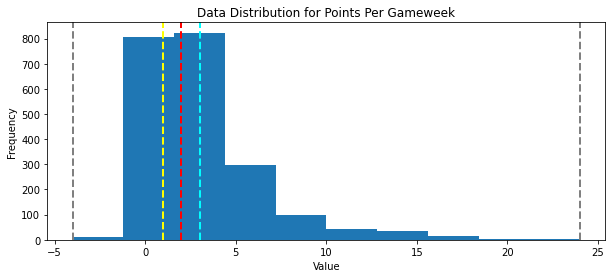

In [26]:
# Get the variable to examine
var_data = data['total_points']

# Get statistics
min_val = var_data.min()
max_val = var_data.max()
mean_val = var_data.mean()
med_val = var_data.median()
mod_val = var_data.mode()[0]

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                        mean_val,
                                                                                        med_val,
                                                                                        mod_val,
                                                                                        max_val))

# Create the figure
fig = plt.figure(figsize = (10,4))

# Plot the histogram
plt.hist(var_data)

# Add lines for the statistics
plt.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

#Add titles and labels
plt.title('Data Distribution for Points Per Gameweek')
plt.xlabel('Value')
plt.ylabel('Frequency')

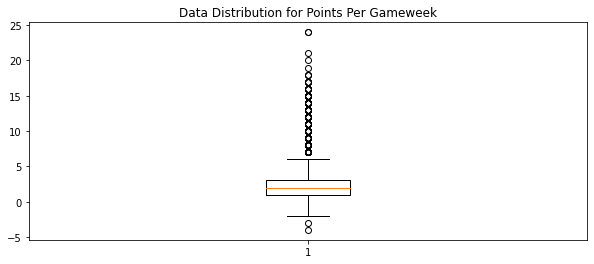

In [27]:
# Create a figure 
fig = plt.figure(figsize = (10,4))

# Plot a boxplot
plt.boxplot(var_data)

# Add titles and labels
plt.title('Data Distribution for Points Per Gameweek')

# Show the figure
fig.show()

Minimum:-2.00
Mean:3.56
Median:2.00
Mode:2.00
Maximum:24.00



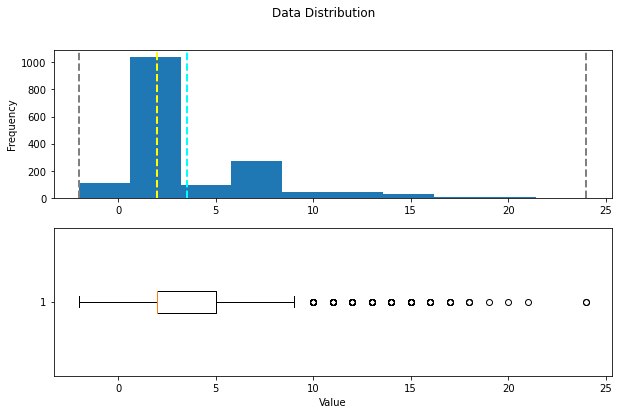

In [88]:
# Create a function that we can re-use
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,6))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()

# Get the variable to examine
input_variable = data[data['minutes_played'] >=60]['total_points']
# Call the function
show_distribution(input_variable)

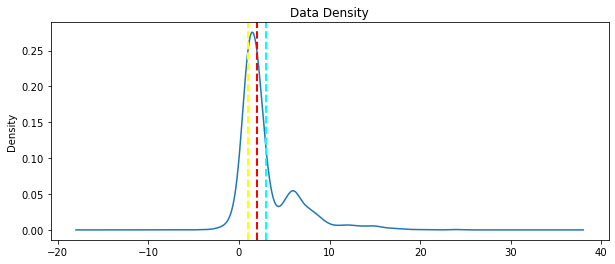

In [92]:
def show_density(var_data):
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2, label= round(var_data.mean(),2))
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2, label= round(var_data.median(),2))
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

# Get the density of Grade
input_variable = data['total_points']
show_density(input_variable)

Minimum:1.00
Mean:72.08
Median:90.00
Mode:90.00
Maximum:90.00



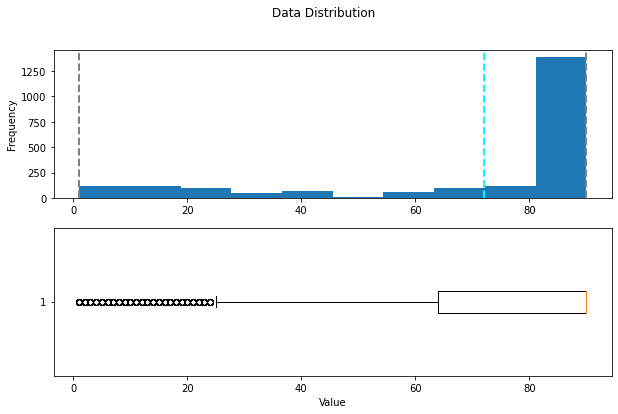

In [93]:
# Get the variable to examine

#input_variable = data[(data.total_points >= -5) & (data.total_points <= 15)]['total_points']
input_variable = data['minutes_played']
# Call the function
show_distribution(input_variable)


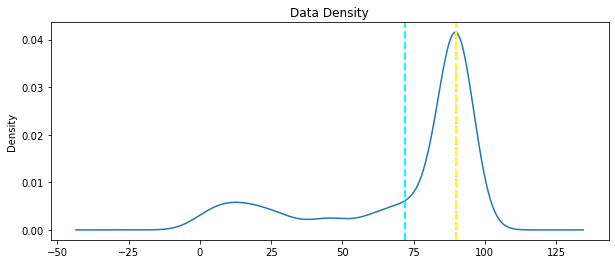

In [94]:
show_density(input_variable)

In [95]:
for col_name in ['total_points','minutes_played']:
    col = data[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print('\n{}:\n - Range: {:.2f}\n - Variance: {:.2f}\n - Std.Dev: {:.2f}'.format(col_name, rng, var, std))


total_points:
 - Range: 28.00
 - Variance: 10.45
 - Std.Dev: 3.23

minutes_played:
 - Range: 89.00
 - Variance: 836.32
 - Std.Dev: 28.92


## Comparing Data

## Comparing numeric and categorical variables

<AxesSubplot:title={'center':'total_points'}, xlabel='home_game'>

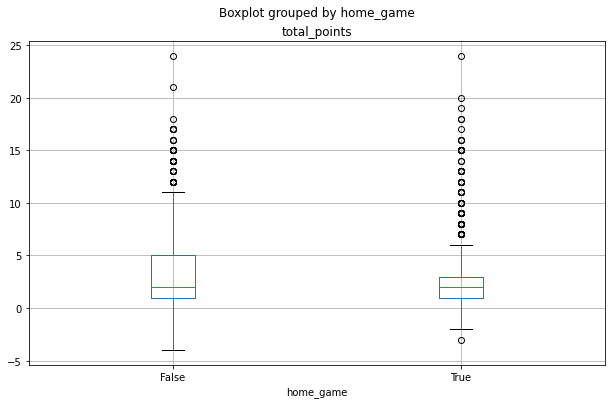

In [96]:
#data_2 = data[(data.total_points >= -1) & (data.total_points <= 20)]
data_2 = data
data_2.boxplot(column="total_points" , by='home_game' , figsize= (10,6))

### Comparing numeric values

In [97]:
data.head()

,player_id,fixture_id,opponent_team_id,total_points,home_game,kickoff_time,round,minutes_played,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,player_price,transfers_balance,selected,transfers_in,transfers_out,team_score,opponent_team_score,team_id,corners_and_indirect_freekicks_order,direct_freekicks_order,penalties_order,team_short_name,position_name_short,team_strength,full_name,opponent_team,opponent_team_strength
339,37,30,11,24,True,2020-10-04 18:15:00,4,90,2,3,0,2,0,0,0,0,0,0,3,90,131.40,54.70,60.00,24.60,7.00,-8464,665271,49799,58263,7,2,2,0.00,0.00,0.00,AVL,MID,3,Jack Grealish,LIV,5
1479,390,17,16,24,False,2020-09-20 11:00:00,2,90,4,0,0,2,0,0,0,0,0,0,2,80,139.60,22.00,86.00,24.80,8.90,-424230,1378891,60870,485100,5,2,17,1.00,0.00,2.00,TOT,MID,4,Heung-Min Son,SOU,3
1477,388,17,16,21,False,2020-09-20 11:00:00,2,83,1,4,0,1,0,0,0,0,0,0,3,81,108.40,40.80,35.00,18.40,10.50,-140554,829125,39756,180310,5,2,17,0.00,0.00,1.00,TOT,FWD,4,Harry Kane,SOU,3
1286,254,3,10,20,True,2020-09-12 16:30:00,1,90,3,0,0,3,0,0,0,0,0,0,3,69,117.20,50.10,161.00,32.80,12.00,0,1883241,0,0,4,3,11,0.00,2.00,2.00,LIV,MID,5,Mohamed Salah,LEE,3
474,514,30,11,19,True,2020-10-04 18:15:00,4,90,3,1,0,2,0,0,0,0,0,0,2,77,124.80,25.70,92.00,24.30,6.00,-21395,88058,5557,26952,7,2,2,0.00,0.00,0.00,AVL,FWD,3,Ollie Watkins,LIV,5


<AxesSubplot:xlabel='team_short_name'>

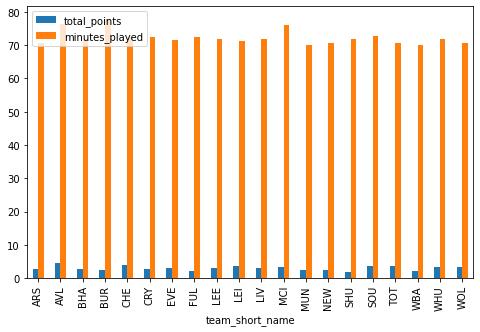

In [110]:
barplot_data = data.groupby(by="team_short_name").mean()
barplot_data.sort_values('total_points' , ascending = False)

barplot_data.plot( y = ["total_points" , "minutes_played"] , kind = "bar" , figsize = (8,5))

In [111]:
from sklearn.preprocessing import MinMaxScaler

# Get a scaler object
scaler = MinMaxScaler()

# Create a new dataframe for the scaled values
data_normalized = data[['team_short_name', 'total_points', 'minutes_played']].copy()
data_normalized = data.groupby(by="team_short_name").mean()
data_normalized.sort_values('total_points' , ascending = False , inplace = True)


In [112]:
# Normalize the numeric columns
data_normalized[['total_points','minutes_played']] = scaler.fit_transform(data_normalized[['total_points','minutes_played']])

<AxesSubplot:xlabel='team_short_name'>

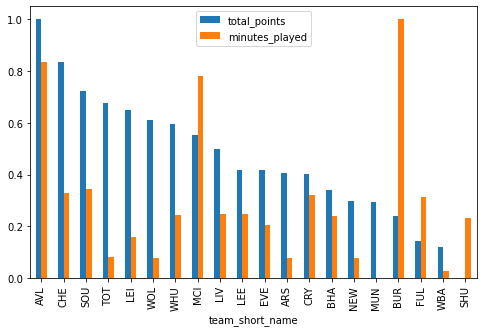

In [113]:
#Plot the normalized values
data_normalized.plot(y=['total_points','minutes_played'], kind='bar', figsize=(8,5))

In [114]:
data.head()

,player_id,fixture_id,opponent_team_id,total_points,home_game,kickoff_time,round,minutes_played,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,player_price,transfers_balance,selected,transfers_in,transfers_out,team_score,opponent_team_score,team_id,corners_and_indirect_freekicks_order,direct_freekicks_order,penalties_order,team_short_name,position_name_short,team_strength,full_name,opponent_team,opponent_team_strength
339,37,30,11,24,True,2020-10-04 18:15:00,4,90,2,3,0,2,0,0,0,0,0,0,3,90,131.40,54.70,60.00,24.60,7.00,-8464,665271,49799,58263,7,2,2,0.00,0.00,0.00,AVL,MID,3,Jack Grealish,LIV,5
1479,390,17,16,24,False,2020-09-20 11:00:00,2,90,4,0,0,2,0,0,0,0,0,0,2,80,139.60,22.00,86.00,24.80,8.90,-424230,1378891,60870,485100,5,2,17,1.00,0.00,2.00,TOT,MID,4,Heung-Min Son,SOU,3
1477,388,17,16,21,False,2020-09-20 11:00:00,2,83,1,4,0,1,0,0,0,0,0,0,3,81,108.40,40.80,35.00,18.40,10.50,-140554,829125,39756,180310,5,2,17,0.00,0.00,1.00,TOT,FWD,4,Harry Kane,SOU,3
1286,254,3,10,20,True,2020-09-12 16:30:00,1,90,3,0,0,3,0,0,0,0,0,0,3,69,117.20,50.10,161.00,32.80,12.00,0,1883241,0,0,4,3,11,0.00,2.00,2.00,LIV,MID,5,Mohamed Salah,LEE,3
474,514,30,11,19,True,2020-10-04 18:15:00,4,90,3,1,0,2,0,0,0,0,0,0,2,77,124.80,25.70,92.00,24.30,6.00,-21395,88058,5557,26952,7,2,2,0.00,0.00,0.00,AVL,FWD,3,Ollie Watkins,LIV,5


<AxesSubplot:title={'center':'Average Total Points Given Per Player'}, xlabel='opponent_team'>

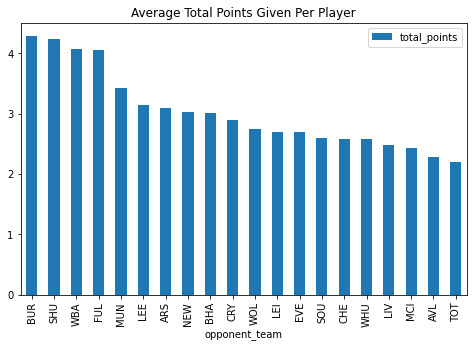

In [116]:
barplot_data = data.groupby(by="opponent_team").mean()
barplot_data.sort_values('total_points' , ascending = False , inplace = True)

barplot_data.plot(
    y = ["total_points"] , 
    kind = "bar" , 
    figsize = (8,5),
    title = 'Average Total Points Given Per Player'
    )
